## 데이터 로드 및 기본 정보 확인

In [1]:
# pandas 라이브러리를 Import하기
import pandas as pd

In [ ]:
# 데이터 파일을 읽어오기
rock_samples = pd.read_csv(r'.\data_0109-0113\rocksamples.csv')
# ('.\\data_0109-0113\\rocksamples.csv')
# ('./data_0109-0113/rocksamples.csv')

In [3]:
# 데이터프레임 처음과 마지막 5개행 확인하기
# 첫 5개 행 확인
rock_samples.head()

,ID,Mission,Type,Subtype,Weight (g),Pristine (%)
0,10001,Apollo11,Soil,Unsieved,125.8,88.36
1,10002,Apollo11,Soil,Unsieved,5629.0,93.73
2,10003,Apollo11,Basalt,Ilmenite,213.0,65.56
3,10004,Apollo11,Core,Unsieved,44.8,71.76
4,10005,Apollo11,Core,Unsieved,53.4,40.31


In [86]:
# 데이터프레임 처음과 마지막 5개행 확인하기
# 마지막 5개 행 확인
rock_samples.tail()

,ID,Mission,Type,Subtype,Weight (g),Pristine (%)
2224,79528,Apollo17,Breccia,Regolith,2.38,100.0
2225,79529,Apollo17,Breccia,Regolith,1.84,100.0
2226,79535,Apollo17,Breccia,Regolith,1.69,100.0
2227,79536,Apollo17,Breccia,Regolith,1.66,100.0
2228,79537,Apollo17,Breccia,Regolith,1.05,100.0


In [87]:
# 데이터프레임 처음과 마지막 5개행 확인하기
# 무작위 5개 행 확인
rock_samples.sample(5)

,ID,Mission,Type,Subtype,Weight (g),Pristine (%)
729,60055,Apollo16,Breccia,Anorthosite,35.48,95.90
524,15388,Apollo15,Basalt,Pigeonite,9.00,22.60
2216,79515,Apollo17,Basalt,Ilmenite,33.00,94.11
1907,75084,Apollo17,Soil,4-10mm,23.31,96.68
262,14271,Apollo14,Breccia,ImpactMelt,97.41,97.88


In [88]:
#rock_samples 데이터프레임 정보 확인하기
rock_samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2229 non-null   int64  
 1   Mission       2229 non-null   object 
 2   Type          2229 non-null   object 
 3   Subtype       2226 non-null   object 
 4   Weight (g)    2229 non-null   float64
 5   Pristine (%)  2229 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 104.6+ KB


In [89]:
#rock_samples 데이터프레임의 모양 확인
rock_samples.shape      # 튜플

(2229, 6)

In [90]:
#rock_samples 데이터프레임 행수 확인
rock_samples.shape[0]

2229

In [91]:
#rock_samples 데이터프레임 열수 확인
rock_samples.shape[1]

6

In [92]:
#rock_samples 데이터 프레임의 인덱스 확인
rock_samples.index

RangeIndex(start=0, stop=2229, step=1)

In [93]:
#rock_samples 데이터프레임의 컬럼명 확인
rock_samples.columns

Index(['ID', 'Mission', 'Type', 'Subtype', 'Weight (g)', 'Pristine (%)'], dtype='object')

In [94]:
#rock_samples 데이터프레임 컬럼들의 데이터타입 확인
rock_samples.dtypes

ID                int64
Mission          object
Type             object
Subtype          object
Weight (g)      float64
Pristine (%)    float64
dtype: object

In [95]:
# rock_samples 데이터프레임 수치 데이터의 요약 통계 확인
rock_samples.describe()

,ID,Weight (g),Pristine (%)
count,2229.000000,2229.000000,2229.000000
mean,52058.432032,168.253024,84.512764
std,26207.651471,637.286458,22.057299
min,10001.000000,0.000000,0.000000
25%,15437.000000,3.000000,80.010000
50%,65527.000000,10.200000,92.300000
75%,72142.000000,93.490000,98.140000
max,79537.000000,11729.000000,180.000000


모델을 구축할 경우에는 이상치를 적절히 가공하는 것이 필요함
- weight에서 0.000 인 데이터 -> 단위 변경 및 삭제 등
- pritine에서 %데이터인데 180으로 100이상이 나오는 데이터 -> 100으로 맞추거나 이상치 제거 등    

이번에는 pass

## 각 컬럼별 누락값 검사

In [4]:
# 1단계 -> rock_samples 데이터프레임에 null값이 있는지 확인
rock_samples.isnull() # 전체 데이터프레임에 대한 T/F

,ID,Mission,Type,Subtype,Weight (g),Pristine (%)
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2224,False,False,False,False,False,False
2225,False,False,False,False,False,False
2226,False,False,False,False,False,False
2227,False,False,False,False,False,False


In [5]:
#결측치 갯수 확인인. false:0, True:1
rock_samples.isnull().sum()

ID              0
Mission         0
Type            0
Subtype         3
Weight (g)      0
Pristine (%)    0
dtype: int64

In [6]:
# 하나라도 isnull인 데이터가 있으면 True
rock_samples.isnull().any(axis=0)

ID              False
Mission         False
Type            False
Subtype          True
Weight (g)      False
Pristine (%)    False
dtype: bool

In [7]:
# 결측치가 있는 행만 출력
rock_samples[ rock_samples['Subtype'].isnull() ]
rock_samples[ rock_samples.isnull().any(axis=1) ] 

# df.any(axis=1): 행 방향으로 검사, 한 행의 컬럼 중 하나라도 True면 해당 행은 True를 반환
# df.any(axis=0) (default): 열 방향으로 검사, 한 열의 데이터 중 하나라도 True면 해당 열은 True를 반환

,ID,Mission,Type,Subtype,Weight (g),Pristine (%)
89,12023,Apollo12,Special,NaN,407.90,66.89
355,15014,Apollo15,Special,NaN,333.20,100.00
1513,70149,Apollo17,Basalt,NaN,0.95,0.00


## 컬럼값 변환 : weight(g) -> weight(kg)
    

In [8]:
rock_samples.head(2)

,ID,Mission,Type,Subtype,Weight (g),Pristine (%)
0,10001,Apollo11,Soil,Unsieved,125.8,88.36
1,10002,Apollo11,Soil,Unsieved,5629.0,93.73


In [9]:
rock_samples['Weight (g)']

0        125.80
1       5629.00
2        213.00
3         44.80
4         53.40
         ...   
2224       2.38
2225       1.84
2226       1.69
2227       1.66
2228       1.05
Name: Weight (g), Length: 2229, dtype: float64

In [10]:
# 1단계 -> 컬럼값변환 : rock_samples['Weight (g)'] -> rock_samples['Weight (kg)]
# rock_samples['Weight (g)'].apply( lambda x : x*0.001)
rock_samples['Weight (g)'] = rock_samples['Weight (g)'] * 0.001

In [11]:
#2단계 -> 컬럼명 변환 : 'Weight(g)' -> 'Weight(kg)
rock_samples.rename(columns = {'Weight (g)' : 'Weight (kg)'}, inplace=True)

In [12]:
rock_samples.head()

,ID,Mission,Type,Subtype,Weight (kg),Pristine (%)
0,10001,Apollo11,Soil,Unsieved,0.1258,88.36
1,10002,Apollo11,Soil,Unsieved,5.6290,93.73
2,10003,Apollo11,Basalt,Ilmenite,0.2130,65.56
3,10004,Apollo11,Core,Unsieved,0.0448,71.76
4,10005,Apollo11,Core,Unsieved,0.0534,40.31


## 아폴로 임무별 채취한 암석의 총 중량 구하기

#### 1) 아폴로 임무별 데이터 프레임 만들기 : missions

In [53]:
# 빈 데이터 프레임을 만들고 변수 mission에 할당한다.
missions = pd.DataFrame()

In [54]:
type(missions)

pandas.core.frame.DataFrame

In [55]:
#rock_samples['Mission']의 중복되지 않은 고유값들을 알아본다.
rock_samples['Mission'].unique()

array(['Apollo11', 'Apollo12', 'Apollo14', 'Apollo15', 'Apollo16',
       'Apollo17'], dtype=object)

In [56]:
# 암석 종류의 고유값
rock_samples['Type'].unique()

array(['Soil', 'Basalt', 'Core', 'Breccia', 'Special', 'Crustal'],
      dtype=object)

In [57]:
# 암석 서브 타입의 고유값
rock_samples['Subtype'].unique()

array(['Unsieved', 'Ilmenite', 'Regolith', 'Cristobalite', 'Olivine',
       'Pigeonite', 'Fragmental', nan, 'Feldspathic', 'Unclassified',
       '2-4mm', '1-2mm', '<1mm', '4-10mm', '>10mm', 'ImpactMelt', 'KREEP',
       'Glass', 'Agglomerate', 'Unstudied', 'Cataclastic', 'Clod',
       'Anorthosite', 'unsieved', 'Plagioclase', 'fragmental',
       'unstudied', 'notstudied', 'Cataclasite', 'Troctolite', 'Norite',
       'Pristine'], dtype=object)

In [58]:
#위의 값들을 mission 데이터프레임의 새로운 컬럼인 mission['Mission']에 할당한다.
missions['Mission'] = rock_samples['Mission'].unique()
missions

,Mission
0,Apollo11
1,Apollo12
2,Apollo14
3,Apollo15
4,Apollo16
5,Apollo17


#### 아폴로 임무별 샘플 중량 총합 컬럼 추가하기

##### 1) 미션 별 총 중량(sample_total_weight) 구하기
* sample_total_weight은 시리즈
* 주의할 점:
    *  인덱스가 mission(Apollo 11)
    * 따라서 .sum()까지만 구하고 바로 missions['']에 넣으면 인덱스 매칭이 안 돼 값이 들어가지 않아서 NaN으로 보임
    * 다음 방법들로 missions df에 넣기!

In [59]:
# rock_samples 데이터프레임의 'Mission' 컬럼을 기준으로 그룹으로 나눈다 -> groupby()
rock_samples.groupby('Mission')['Weight (kg)']

In [60]:
# 나누어진 그룹에서 'weight (kg)' 컬럼의 총합을 구한다 -> groupby('Mission')['weight (kg)].sum()
# 결국 아폴로 달탐사 임무별로 수집해온 암석 샘플 총중량을 구해서 새로운 변수에 할당한다. -> 이 변수는 시리즈이다.
sample_total_weight = rock_samples.groupby('Mission')['Weight (kg)'].sum()
sample_total_weight

Mission
Apollo11     21.55424
Apollo12     34.34238
Apollo14     41.83363
Apollo15     75.39910
Apollo16     92.46262
Apollo17    109.44402
Name: Weight (kg), dtype: float64

##### 2) 계산한 총 중량을 missions 데이터프레임에 컬럼으로 추가
방법1: merge로 'Missions' 컬럼 기준으로 병합하기    
방법2: .values로 값을 바로 'Sample weight (kg)'열에 넣어주기    
방법3: .map으로 매핑하기 (이건 하지는 않음)

In [61]:
# 방법1: missions 데이터프레임과 sample_total_weight 시리즈를 병합한다.
# missions = pd.merge( missions, sample_total_weight, on='Mission')
# missions

In [62]:
# 방법1: 컬럼명을 'Weight (kg)' 을 'Sample weight (kg)'으로 변경한다.
# missions.rename(columns={'Weight (kg)' : 'Sample weight (kg)'})

방법2

In [63]:
# sample_total_weight의 인덱스 확인
# 시리즈의 인덱스 확인
sample_total_weight.index

Index(['Apollo11', 'Apollo12', 'Apollo14', 'Apollo15', 'Apollo16', 'Apollo17'], dtype='object', name='Mission')

In [64]:
# sample_total_weight의 값 확인
# 시리즈의 값 확인
# 병합 시에는 이 값을 열에 바로 넣어주면 된다
sample_total_weight.values

array([ 21.55424,  34.34238,  41.83363,  75.3991 ,  92.46262, 109.44402])

In [65]:
# 방법2
missions['Sample weight (kg)'] = rock_samples.groupby('Mission')['Weight (kg)'].sum().values

### 총 중량 비교/분석하기

#### 1) 미션별 암석 중량 증가 차이

In [66]:
missions.head(3)

,Mission,Sample weight (kg)
0,Apollo11,21.55424
1,Apollo12,34.34238
2,Apollo14,41.83363


In [67]:
# 임무간 중량 차이 구하기
# 1. 미션 별 암석의 중량 증가 패턴, 미션 별 우주선 무게 증감데이터
# diff() : 이전 행과 현재 행의 차이를 계산해서 현재 행 값에 넣어줌
missions['Sample weight (kg)'].diff()

0         NaN
1    12.78814
2     7.49125
3    33.56547
4    17.06352
5    16.98140
Name: Sample weight (kg), dtype: float64

In [68]:
# 아폴로 임무간의 수집해온 암석 샘플 총중량 차이를 나타내는 컬럼 'Weight diff'를 missions 데이터프레임에 추가
missions['Weight diff'] = missions['Sample weight (kg)'].diff()
missions

,Mission,Sample weight (kg),Weight diff
0,Apollo11,21.55424,NaN
1,Apollo12,34.34238,12.78814
2,Apollo14,41.83363,7.49125
3,Apollo15,75.39910,33.56547
4,Apollo16,92.46262,17.06352
5,Apollo17,109.44402,16.98140


In [69]:
# 아폴로 11은 그 전 달탐사가 없어 NaN 값을 가지므로 결측치 0으로 채우기
# missions.fillna(value=0)
missions.fillna(value=0, inplace=True)
missions

,Mission,Sample weight (kg),Weight diff
0,Apollo11,21.55424,0.00000
1,Apollo12,34.34238,12.78814
2,Apollo14,41.83363,7.49125
3,Apollo15,75.39910,33.56547
4,Apollo16,92.46262,17.06352
5,Apollo17,109.44402,16.98140


#### 2) 모듈 무게 증감 패턴
* 1. 달 모듈 무게 증감 패턴
* 2. 명령 모듈 무게 증감 패턴
* 3. 승무원 모듈(달+명령) 무게 증감 패턴

1. 달 모듈 무게 증감 패턴

In [70]:
# 달 탐사선 = 달모듈 + 명령모듈 --> 이 둘을 합쳐서 승무원 모듈
# 달 모듈의 이름, 중량 컬럼을 missions 데이터프레임에 추가
missions['Lunar module (LM)'] = ['Eagle (LM-5)', 'Intrepid (LM-6)', 'Antares (LM-8)', 'Falcon (LM-10)', 'Orion (LM-11)', 'Challenger (LM-12)']
missions['LM mass (kg)'] = [15103, 15235, 15264, 16430, 16445, 16456]
missions

,Mission,Sample weight (kg),Weight diff,Lunar module (LM),LM mass (kg)
0,Apollo11,21.55424,0.00000,Eagle (LM-5),15103
1,Apollo12,34.34238,12.78814,Intrepid (LM-6),15235
2,Apollo14,41.83363,7.49125,Antares (LM-8),15264
3,Apollo15,75.39910,33.56547,Falcon (LM-10),16430
4,Apollo16,92.46262,17.06352,Orion (LM-11),16445
5,Apollo17,109.44402,16.98140,Challenger (LM-12),16456


In [71]:
# 아폴로 임무별로 달모듈 중량 차이를 구해서 새로운 컬럼 'LM mass diff'를 만들어서  missions 데이터프레임에 추가
missions['LM mass diff'] = missions['LM mass (kg)'].diff()
missions

,Mission,Sample weight (kg),Weight diff,Lunar module (LM),LM mass (kg),LM mass diff
0,Apollo11,21.55424,0.00000,Eagle (LM-5),15103,NaN
1,Apollo12,34.34238,12.78814,Intrepid (LM-6),15235,132.0
2,Apollo14,41.83363,7.49125,Antares (LM-8),15264,29.0
3,Apollo15,75.39910,33.56547,Falcon (LM-10),16430,1166.0
4,Apollo16,92.46262,17.06352,Orion (LM-11),16445,15.0
5,Apollo17,109.44402,16.98140,Challenger (LM-12),16456,11.0


In [72]:
# 결측치가 있다면 0으로 채우기
missions.fillna(value=0, inplace=True)
missions

,Mission,Sample weight (kg),Weight diff,Lunar module (LM),LM mass (kg),LM mass diff
0,Apollo11,21.55424,0.00000,Eagle (LM-5),15103,0.0
1,Apollo12,34.34238,12.78814,Intrepid (LM-6),15235,132.0
2,Apollo14,41.83363,7.49125,Antares (LM-8),15264,29.0
3,Apollo15,75.39910,33.56547,Falcon (LM-10),16430,1166.0
4,Apollo16,92.46262,17.06352,Orion (LM-11),16445,15.0
5,Apollo17,109.44402,16.98140,Challenger (LM-12),16456,11.0


2. 명령 모듈 무게 증감 패턴

In [73]:
#명령모듈의 이름, 중량 컬럼을 missionms 데이터프레임에 추가
missions['Command Module (CM)'] = ['Columbia (CSM-107]', 'Yankee Clipper (CM-100])', 'Kitty Hawk (CM-110)', 'Endeavor (CM-112)', 'Casper (CM-113)', 'America (CM-114)']
missions['CM Mass (kg)'] = [5560, 5609, 5758, 5875, 5840, 5960]
missions

,Mission,Sample weight (kg),Weight diff,Lunar module (LM),LM mass (kg),LM mass diff,Command Module (CM),CM Mass (kg)
0,Apollo11,21.55424,0.00000,Eagle (LM-5),15103,0.0,Columbia (CSM-107],5560
1,Apollo12,34.34238,12.78814,Intrepid (LM-6),15235,132.0,Yankee Clipper (CM-100]),5609
2,Apollo14,41.83363,7.49125,Antares (LM-8),15264,29.0,Kitty Hawk (CM-110),5758
3,Apollo15,75.39910,33.56547,Falcon (LM-10),16430,1166.0,Endeavor (CM-112),5875
4,Apollo16,92.46262,17.06352,Orion (LM-11),16445,15.0,Casper (CM-113),5840
5,Apollo17,109.44402,16.98140,Challenger (LM-12),16456,11.0,America (CM-114),5960


In [74]:
#임무간 명령 모듈 중량 차이 구하기기
#아폴로 임무별로 명령모듈 중량 차이를 구해서 새로운 컬럼 'CM Mass diff'를 만들어 missions 데이터프레임에 추가
missions['CM mass diff'] = missions['CM Mass (kg)'].diff().fillna(0)
missions

,Mission,Sample weight (kg),Weight diff,Lunar module (LM),LM mass (kg),LM mass diff,Command Module (CM),CM Mass (kg),CM mass diff
0,Apollo11,21.55424,0.00000,Eagle (LM-5),15103,0.0,Columbia (CSM-107],5560,0.0
1,Apollo12,34.34238,12.78814,Intrepid (LM-6),15235,132.0,Yankee Clipper (CM-100]),5609,49.0
2,Apollo14,41.83363,7.49125,Antares (LM-8),15264,29.0,Kitty Hawk (CM-110),5758,149.0
3,Apollo15,75.39910,33.56547,Falcon (LM-10),16430,1166.0,Endeavor (CM-112),5875,117.0
4,Apollo16,92.46262,17.06352,Orion (LM-11),16445,15.0,Casper (CM-113),5840,-35.0
5,Apollo17,109.44402,16.98140,Challenger (LM-12),16456,11.0,America (CM-114),5960,120.0


.fillna() 메소드 차이   
* 패턴 1: 새로운 객체 반환 (inplace=False, 기본값), 메서드 체이닝 시 사용
``` new_df = df.fillna(0)  # 원본은 그대로, 새 DataFrame 반환 ```

* 패턴 2: 원본 수정 (inplace=True), 단계별로 수행, 원본 수정 여부 확인 시 사용
``` df.fillna(0, inplace=True)  # 원본을 직접 수정, None 반환 ```

In [75]:
# 승무원영역 = 달모듈 + 명령모듈
# 달 모듈과 명령모듈 중량을 합한 값을 'Total weight (kg)'라는 새로운 컬럼을 만들어 missions 데이터프레임에 추가
missions['Total weight (kg)'] = missions['LM mass (kg)'] + missions['CM Mass (kg)'] # 자동으로 벡터 연산
missions

,Mission,Sample weight (kg),Weight diff,Lunar module (LM),LM mass (kg),LM mass diff,Command Module (CM),CM Mass (kg),CM mass diff,Total weight (kg)
0,Apollo11,21.55424,0.00000,Eagle (LM-5),15103,0.0,Columbia (CSM-107],5560,0.0,20663
1,Apollo12,34.34238,12.78814,Intrepid (LM-6),15235,132.0,Yankee Clipper (CM-100]),5609,49.0,20844
2,Apollo14,41.83363,7.49125,Antares (LM-8),15264,29.0,Kitty Hawk (CM-110),5758,149.0,21022
3,Apollo15,75.39910,33.56547,Falcon (LM-10),16430,1166.0,Endeavor (CM-112),5875,117.0,22305
4,Apollo16,92.46262,17.06352,Orion (LM-11),16445,15.0,Casper (CM-113),5840,-35.0,22285
5,Apollo17,109.44402,16.98140,Challenger (LM-12),16456,11.0,America (CM-114),5960,120.0,22416


In [76]:
# 승무원 영역을 나타내는 'Total weight (kg)'의 아폴로 임무별 중량 차이를 구하는 새로운 컬럼 'Total weight diff'를 missions 데이터프레임에 추가
missions['Total weight diff'] = missions['Total weight (kg)'].diff().fillna(0)
missions

,Mission,Sample weight (kg),Weight diff,Lunar module (LM),LM mass (kg),LM mass diff,Command Module (CM),CM Mass (kg),CM mass diff,Total weight (kg),Total weight diff
0,Apollo11,21.55424,0.00000,Eagle (LM-5),15103,0.0,Columbia (CSM-107],5560,0.0,20663,0.0
1,Apollo12,34.34238,12.78814,Intrepid (LM-6),15235,132.0,Yankee Clipper (CM-100]),5609,49.0,20844,181.0
2,Apollo14,41.83363,7.49125,Antares (LM-8),15264,29.0,Kitty Hawk (CM-110),5758,149.0,21022,178.0
3,Apollo15,75.39910,33.56547,Falcon (LM-10),16430,1166.0,Endeavor (CM-112),5875,117.0,22305,1283.0
4,Apollo16,92.46262,17.06352,Orion (LM-11),16445,15.0,Casper (CM-113),5840,-35.0,22285,-20.0
5,Apollo17,109.44402,16.98140,Challenger (LM-12),16456,11.0,America (CM-114),5960,120.0,22416,131.0


In [77]:
# 결측치 한 번에 처리해도 됨
# missions.fillna(0)

#### 3) 모듈 무게의 비율 구하기

In [78]:
# 페이로드에서 승무원 영역이 차지하는 비율 구하기 -> 'Crewed area : Payload'
saturnVPayload = 43500
missions['Crewed area : Payload'] = missions['Total weight (kg)'] / saturnVPayload
missions

,Mission,Sample weight (kg),Weight diff,Lunar module (LM),LM mass (kg),LM mass diff,Command Module (CM),CM Mass (kg),CM mass diff,Total weight (kg),Total weight diff,Crewed area : Payload
0,Apollo11,21.55424,0.00000,Eagle (LM-5),15103,0.0,Columbia (CSM-107],5560,0.0,20663,0.0,0.475011
1,Apollo12,34.34238,12.78814,Intrepid (LM-6),15235,132.0,Yankee Clipper (CM-100]),5609,49.0,20844,181.0,0.479172
2,Apollo14,41.83363,7.49125,Antares (LM-8),15264,29.0,Kitty Hawk (CM-110),5758,149.0,21022,178.0,0.483264
3,Apollo15,75.39910,33.56547,Falcon (LM-10),16430,1166.0,Endeavor (CM-112),5875,117.0,22305,1283.0,0.512759
4,Apollo16,92.46262,17.06352,Orion (LM-11),16445,15.0,Casper (CM-113),5840,-35.0,22285,-20.0,0.512299
5,Apollo17,109.44402,16.98140,Challenger (LM-12),16456,11.0,America (CM-114),5960,120.0,22416,131.0,0.515310


In [79]:
# 승무원 영역에서 암석 샘플이 차지하는 비율 구하기 -> 'Sample : Crewed area'
missions['Sample : Crewed area'] = missions['Sample weight (kg)'] / missions['Total weight (kg)']
missions

,Mission,Sample weight (kg),Weight diff,Lunar module (LM),LM mass (kg),LM mass diff,Command Module (CM),CM Mass (kg),CM mass diff,Total weight (kg),Total weight diff,Crewed area : Payload,Sample : Crewed area
0,Apollo11,21.55424,0.00000,Eagle (LM-5),15103,0.0,Columbia (CSM-107],5560,0.0,20663,0.0,0.475011,0.001043
1,Apollo12,34.34238,12.78814,Intrepid (LM-6),15235,132.0,Yankee Clipper (CM-100]),5609,49.0,20844,181.0,0.479172,0.001648
2,Apollo14,41.83363,7.49125,Antares (LM-8),15264,29.0,Kitty Hawk (CM-110),5758,149.0,21022,178.0,0.483264,0.001990
3,Apollo15,75.39910,33.56547,Falcon (LM-10),16430,1166.0,Endeavor (CM-112),5875,117.0,22305,1283.0,0.512759,0.003380
4,Apollo16,92.46262,17.06352,Orion (LM-11),16445,15.0,Casper (CM-113),5840,-35.0,22285,-20.0,0.512299,0.004149
5,Apollo17,109.44402,16.98140,Challenger (LM-12),16456,11.0,America (CM-114),5960,120.0,22416,131.0,0.515310,0.004882


In [80]:
# 페이로드에서 샘플이 차지하는 비율 구하기 -> 'Sample : Payload'
missions['Sample : Payload'] = missions['Sample weight (kg)'] / saturnVPayload
missions

,Mission,Sample weight (kg),Weight diff,Lunar module (LM),LM mass (kg),LM mass diff,Command Module (CM),CM Mass (kg),CM mass diff,Total weight (kg),Total weight diff,Crewed area : Payload,Sample : Crewed area,Sample : Payload
0,Apollo11,21.55424,0.00000,Eagle (LM-5),15103,0.0,Columbia (CSM-107],5560,0.0,20663,0.0,0.475011,0.001043,0.000495
1,Apollo12,34.34238,12.78814,Intrepid (LM-6),15235,132.0,Yankee Clipper (CM-100]),5609,49.0,20844,181.0,0.479172,0.001648,0.000789
2,Apollo14,41.83363,7.49125,Antares (LM-8),15264,29.0,Kitty Hawk (CM-110),5758,149.0,21022,178.0,0.483264,0.001990,0.000962
3,Apollo15,75.39910,33.56547,Falcon (LM-10),16430,1166.0,Endeavor (CM-112),5875,117.0,22305,1283.0,0.512759,0.003380,0.001733
4,Apollo16,92.46262,17.06352,Orion (LM-11),16445,15.0,Casper (CM-113),5840,-35.0,22285,-20.0,0.512299,0.004149,0.002126
5,Apollo17,109.44402,16.98140,Challenger (LM-12),16456,11.0,America (CM-114),5960,120.0,22416,131.0,0.515310,0.004882,0.002516


## artemis_mission 데이터프레임 만들기  

### 아르테미스의 중량 비율 계산하기
아폴로 미션에서 계산했던 여러 중량 데이터를 기반으로 현재 아르테미스 미션의 중량을 계산해보자

In [81]:
artemis_crewedArea = 26520

artemis_dict = {'Mission' : ['artemis1', 'artemis1b', 'artemis2'],
                'Total weight (kg)' : [artemis_crewedArea, artemis_crewedArea, artemis_crewedArea],
                'Payload (kg)' : [26988, 37965, 42955]
               }

#딕셔너리를 데이터 프레임으로 저장하기
artemis_mission = pd.DataFrame(artemis_dict)
artemis_mission

,Mission,Total weight (kg),Payload (kg)
0,artemis1,26520,26988
1,artemis1b,26520,37965
2,artemis2,26520,42955


```pd.DataFrame(data)``` : 가장 간단한 방법으로, 딕셔너리의 키(Key)가 칼럼명, 값(Value)이 리스트인 경우 사용.   
```pd.DataFrame.from_dict(data, orient='index')``` : 딕셔너리의 키를 행 인덱스로 설정할 때 유용.

In [82]:
# missions 데이터프레임에서 'Crewed area : Payload', 'Sample : Crewed area', 'Sample : payload' 의 평균값을 구한다.
# 아폴로 미션들의 비율들의 평균 => 대략적인 비율들 구하기
crewedArea_payload_ratio = missions['Crewed area : Payload'].mean()
sample_crewedArea_ratio = missions['Sample : Crewed area'].mean()
sample_payload_ratio = missions['Sample : Payload'].mean()

print(crewedArea_payload_ratio) # 페이로드에서 승무원 영역의 비율
print(sample_crewedArea_ratio)  # 승무원 영역에서 샘플의 비율
print(sample_payload_ratio)      # 페이로드 영역에서 샘플의 비율

0.4963026819923371
0.002848764392685611
0.0014369195019157087


In [83]:
# missions 데이터프레임에서 'Sample weight (kg)'의 총합을 구한다.
print(missions['Sample weight (kg)'].sum())

375.03598999999997


In [84]:
# artemis_missions 데이터 프레임에 'Sample weight from total (kg)' 컬럼을 추가한다.
# 'Sample weight from total (kg)' : 전체(승무원 영역)에서 sample의 중량
# = 전체(승무원 영역) 무게 * 샘플이 전체(승무원 영역)에서 차지하는 비율
# = total weight * (total weight * 위에서 구한 '승무원 영역에서 샘플의 비율' )
# 시리즈 * 값 해도 계산이 되므로 그냥 곱해도 된다
artemis_mission['Sample weight from total (kg)'] = artemis_mission['Total weight (kg)'] * sample_crewedArea_ratio
artemis_mission

,Mission,Total weight (kg),Payload (kg),Sample weight from total (kg)
0,artemis1,26520,26988,75.549232
1,artemis1b,26520,37965,75.549232
2,artemis2,26520,42955,75.549232


In [85]:
#artemis_mission 데이터프레임에 'Sample weight from payload (kg)' 컬럼을 추가한다.
artemis_mission['Sample weight from payload (kg)'] = artemis_mission['Payload (kg)'] * sample_payload_ratio
artemis_mission

,Mission,Total weight (kg),Payload (kg),Sample weight from total (kg),Sample weight from payload (kg)
0,artemis1,26520,26988,75.549232,38.779584
1,artemis1b,26520,37965,75.549232,54.552649
2,artemis2,26520,42955,75.549232,61.722877


In [86]:
# artemis_mission 데이터프레임에 'Estimated sample weight (kg)' 컬럼을 추가한다.
artemis_mission['Estimated sample weight (kg)'] = (artemis_mission['Sample weight from total (kg)'] + artemis_mission['Sample weight from payload (kg)']) / 2
artemis_mission

,Mission,Total weight (kg),Payload (kg),Sample weight from total (kg),Sample weight from payload (kg),Estimated sample weight (kg)
0,artemis1,26520,26988,75.549232,38.779584,57.164408
1,artemis1b,26520,37965,75.549232,54.552649,65.050940
2,artemis2,26520,42955,75.549232,61.722877,68.636054


3번의 미션에서 대략 채취할 암석의 무게를 구했다! (Estimated sample weight)

### 아르테미스 임무에서 가져올 암석 종류 구하기

In [87]:
# rock_samples의 5개 정보 확인하기
rock_samples.head()

,ID,Mission,Type,Subtype,Weight (kg),Pristine (%),Remaining (kg)
0,10001,Apollo11,Soil,Unsieved,0.1258,88.36,0.111157
1,10002,Apollo11,Soil,Unsieved,5.6290,93.73,5.276062
2,10003,Apollo11,Basalt,Ilmenite,0.2130,65.56,0.139643
3,10004,Apollo11,Core,Unsieved,0.0448,71.76,0.032148
4,10005,Apollo11,Core,Unsieved,0.0534,40.31,0.021526


In [ ]:
# rock_samples 데이터프레임에 암석샘플의 남은 양을 나타내는 'Remaining (kg)' 컬럼추가
rock_samples['Remaining (kg)'] = rock_samples['Weight (kg)'] * rock_samples['Pristine (%)']*0.01
rock_samples.head()

,ID,Mission,Type,Subtype,Weight (kg),Pristine (%),Remaining (kg)
0,10001,Apollo11,Soil,Unsieved,0.1258,88.36,0.111157
1,10002,Apollo11,Soil,Unsieved,5.6290,93.73,5.276062
2,10003,Apollo11,Basalt,Ilmenite,0.2130,65.56,0.139643
3,10004,Apollo11,Core,Unsieved,0.0448,71.76,0.032148
4,10005,Apollo11,Core,Unsieved,0.0534,40.31,0.021526


In [89]:
# rock_samples 수치데이터 요약 통계 확인
rock_samples.describe()

,ID,Weight (kg),Pristine (%),Remaining (kg)
count,2229.000000,2229.000000,2229.000000,2229.000000
mean,52058.432032,0.168253,84.512764,0.138103
std,26207.651471,0.637286,22.057299,0.525954
min,10001.000000,0.000000,0.000000,0.000000
25%,15437.000000,0.003000,80.010000,0.002432
50%,65527.000000,0.010200,92.300000,0.008530
75%,72142.000000,0.093490,98.140000,0.078240
max,79537.000000,11.729000,180.000000,11.169527


암석들의 무게 평균 = 0.16kg

In [90]:
# rock_samples['Weight (kg)']의 모든 값이 0.16kg 이상 인지 확인
rock_samples['Weight (kg)'] >= 0.16

0       False
1        True
2        True
3       False
4       False
        ...  
2224    False
2225    False
2226    False
2227    False
2228    False
Name: Weight (kg), Length: 2229, dtype: bool

In [91]:
# rock_samples['Weight (kg)']이 0.16kg 이상 이면서 rock_samples['Pristine (%)']이 50 이하인지 확인
(rock_samples['Weight (kg)'] >= 0.16) & (rock_samples['Pristine (%)'] <= 50)

0       False
1       False
2       False
3       False
4       False
        ...  
2224    False
2225    False
2226    False
2227    False
2228    False
Length: 2229, dtype: bool

적게 남아 있는 샘플들 추출

In [18]:
# 위의 두 조건을 모두 만족하는 행만 추출해서 low_samples라는 데이터 프레임을 만든다.
# 연구 등의 이유로 많이 사용해 적게 남아 있는 샘플들만 추출 
low_samples = rock_samples[ (rock_samples['Weight (kg)'] >= 0.16) & (rock_samples['Pristine (%)'] <= 50) ]
low_samples.head()

,ID,Mission,Type,Subtype,Weight (kg),Pristine (%),Remaining (kg)
11,10017,Apollo11,Basalt,Ilmenite,0.973,43.71,0.425298
14,10020,Apollo11,Basalt,Ilmenite,0.425,27.88,0.118490
15,10021,Apollo11,Breccia,Regolith,0.250,30.21,0.075525
29,10045,Apollo11,Basalt,Olivine,0.185,12.13,0.022441
37,10057,Apollo11,Basalt,Ilmenite,0.919,35.15,0.323028


In [19]:
low_samples.info()
# 27개가 기준치보다 적게 남아있음

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 11 to 2183
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              27 non-null     int64  
 1   Mission         27 non-null     object 
 2   Type            27 non-null     object 
 3   Subtype         27 non-null     object 
 4   Weight (kg)     27 non-null     float64
 5   Pristine (%)    27 non-null     float64
 6   Remaining (kg)  27 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.7+ KB


In [20]:
low_samples['Type'].unique()    # 4가지 정도가 남아 있음

array(['Basalt', 'Breccia', 'Soil', 'Core'], dtype=object)

In [21]:
# low_samples 데이터프레임에서 암석유형('Type')별로 개수를 센다.
# low_samples.groupby('Type')['Type'].count()
low_samples['Type'].value_counts()

Type
Basalt     14
Breccia     8
Soil        4
Core        1
Name: count, dtype: int64

In [22]:
#low_samples['Type']의 값이 'Basalt'이거나 'Breccia' 인지 확인 -> isin(리스트)
low_samples['Type'].isin(['Basalt', 'Breccia'])

11       True
14       True
15       True
29       True
37       True
39       True
52       True
59      False
68       True
69      False
72       True
94      False
113      True
118      True
120      True
353     False
354     False
426      True
534      True
570      True
575      True
607      True
718      True
722      True
1221     True
1645     True
2183     True
Name: Type, dtype: bool

적게 남은 샘플들 중에서 빈도 수가 많은 샘플들 고름

In [23]:
# low_samples['Type'] 의 값이 'Basalt'이거나 'Breccia'인 행만 추출해서 needed_samples 데이터프레임 만들기
needed_samples = low_samples[ low_samples['Type'].isin(['Basalt', 'Breccia']) ]
needed_samples.head()

,ID,Mission,Type,Subtype,Weight (kg),Pristine (%),Remaining (kg)
11,10017,Apollo11,Basalt,Ilmenite,0.973,43.71,0.425298
14,10020,Apollo11,Basalt,Ilmenite,0.425,27.88,0.118490
15,10021,Apollo11,Breccia,Regolith,0.250,30.21,0.075525
29,10045,Apollo11,Basalt,Olivine,0.185,12.13,0.022441
37,10057,Apollo11,Basalt,Ilmenite,0.919,35.15,0.323028


In [24]:
# needed_samples 정보확인
needed_samples.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 11 to 2183
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              22 non-null     int64  
 1   Mission         22 non-null     object 
 2   Type            22 non-null     object 
 3   Subtype         22 non-null     object 
 4   Weight (kg)     22 non-null     float64
 5   Pristine (%)    22 non-null     float64
 6   Remaining (kg)  22 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.4+ KB


In [25]:
# needed_samples 데이터프레임에서 'Type'으로 groupby해서 암석 샘플의 총중량의 합을 구한다
needed_samples.groupby('Type')['Weight (kg)'].sum()

Type
Basalt     17.4234
Breccia    10.1185
Name: Weight (kg), dtype: float64

수집한 양 자체가 적어서 안 남아있는 경우도 구해서 추가하기

In [26]:
# rock_samples 데이터프레임에서 'Type'으로 groupby 해서 암석 샘플의 중량의 합을 구한다. 
#           -> 아폴로 임무에서 처음부터 수집이 안된 암석을 구한다.

rock_samples.groupby('Type')['Weight (kg)'].sum()

Type
Basalt      93.14077
Breccia    168.88075
Core        19.93587
Crustal      4.74469
Soil        87.58981
Special      0.74410
Name: Weight (kg), dtype: float64

Crustal이 수집한 양 자체가 적었으므로 needed_samples에 추가하기

In [27]:
rock_samples['Type'] == 'Crustal'

0       False
1       False
2       False
3       False
4       False
        ...  
2224    False
2225    False
2226    False
2227    False
2228    False
Name: Type, Length: 2229, dtype: bool

In [28]:
# rock_samples에서 'Type'이 'Crustal'. 인 행만 추출한다.
crustals = rock_samples[ rock_samples['Type'] == 'Crustal']
crustals.head()

,ID,Mission,Type,Subtype,Weight (kg),Pristine (%),Remaining (kg)
497,15361,Apollo15,Crustal,Cataclastic,0.0009,66.56,0.000599
498,15362,Apollo15,Crustal,Cataclastic,0.0042,56.88,0.002389
499,15363,Apollo15,Crustal,Cataclastic,0.0005,71.00,0.000355
540,15415,Apollo15,Crustal,Anorthosite,0.2694,67.07,0.180687
557,15437,Apollo15,Crustal,Anorthosite,0.0010,80.00,0.000800


In [173]:
# needed_samples에 crustal을 추가한다.
needed_samples = pd.concat( [needed_samples, crustals] )
needed_samples

,ID,Mission,Type,Subtype,Weight (kg),Pristine (%),Remaining (kg)
11,10017,Apollo11,Basalt,Ilmenite,0.97300,43.71,0.425298
14,10020,Apollo11,Basalt,Ilmenite,0.42500,27.88,0.118490
15,10021,Apollo11,Breccia,Regolith,0.25000,30.21,0.075525
29,10045,Apollo11,Basalt,Olivine,0.18500,12.13,0.022441
37,10057,Apollo11,Basalt,Ilmenite,0.91900,35.15,0.323028
...,...,...,...,...,...,...,...
2089,78238,Apollo17,Crustal,Norite,0.00000,86.03,0.000000
2092,78256,Apollo17,Crustal,Pristine,0.00000,0.00,0.000000
2126,78517,Apollo17,Crustal,Cataclasite,0.00182,82.97,0.001510
2130,78527,Apollo17,Crustal,Cataclasite,0.00516,82.05,0.004234


* 가로로 병합 => ```df.merge()```
    * 한 번에 하나씩 
* 세로로 병합 => ```df.concat( iterable list )```
    * 한 번에 여러 개 가능

In [30]:
needed_samples.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, 11 to 2189
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              68 non-null     int64  
 1   Mission         68 non-null     object 
 2   Type            68 non-null     object 
 3   Subtype         68 non-null     object 
 4   Weight (kg)     68 non-null     float64
 5   Pristine (%)    68 non-null     float64
 6   Remaining (kg)  68 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 4.2+ KB


In [31]:
needed_samples.Type.unique()

array(['Basalt', 'Breccia', 'Crustal'], dtype=object)

In [32]:
needed_samples['Type'].unique()

array(['Basalt', 'Breccia', 'Crustal'], dtype=object)

필요한 암석은 3가지! 'Basalt', 'Breccia', 'Crustal'

## needed samples overview 만들기

어떤 암석을 채취할 지 결정 완료! 
이제 보고서를 작성해보자

In [211]:
## 아르테미스 임무에 전달할 최종 데이터프레임 needed_samples_overview 만든다.
needed_samples_overview = pd.DataFrame()

In [212]:
# needed samples 데이터프레임에서 중복되지 않은 암석유형을 추출한다.
needed_samples_overview['Type'] = needed_samples['Type'].unique()
needed_samples_overview

,Type
0,Basalt
1,Breccia
2,Crustal


In [213]:
# needed_samples 데이터프레임에서 암석유형별('Type') 중량 합을 구한다.
needed_samples.groupby('Type')['Weight (kg)'].sum()

Type
Basalt     17.42340
Breccia    10.11850
Crustal     9.48938
Name: Weight (kg), dtype: float64

In [214]:
# 암석 유형별 중량 합의 데이터프레임을 만들려고 한다.
needed_sample_weight = needed_samples.groupby('Type')['Weight (kg)'].sum().reset_index()
needed_sample_weight

,Type,Weight (kg)
0,Basalt,17.42340
1,Breccia,10.11850
2,Crustal,9.48938


```df.reset_index()``` : 시리즈를 데이터프레임으로 만들면 그 시리즈 자체가 인덱스가 되는데 이를 방지하기 위해 인덱스를 기본(0,1,2,)로 초기화하는 함수

In [215]:
# # 두 데이터프레임을 병합한다.
# # 1) 열 이름 한번에 수정, .values 사용 ** 더 간단하므로 1 사용
# needed_samples_overview['Total weight (kg)'] = needed_sample_weight['Weight (kg)'].values

# # 2) merge 사용(인덱스 같으므로 기준 설정 X), 열 이름 별도로 수정
# # needed_samples_overview = pd.merge( needed_samples_overview, needed_sample_weight)
# # needed_samples_overview.rename(columns={'Weight (kg)' : 'Total weight (kg)'})

# needed_samples_overview

In [216]:
# Total Weight (kg) 한 번에 계산하기
needed_samples_overview['Total weight (kg)'] = needed_samples.groupby('Type')['Weight (kg)'].sum().values
needed_samples_overview

,Type,Total weight (kg)
0,Basalt,17.42340
1,Breccia,10.11850
2,Crustal,9.48938


In [217]:
# needed_samples 데이터프레임에서 암석유형별 중량의 평균을 구해 needed_samples_overview['Average weight (kg)'] 로 추가한다.
# 한 번에 작성(체이닝 메서드)하기 위해 .values 사용
needed_samples_overview['Average weight (kg)'] = needed_samples.groupby('Type')['Weight (kg)'].mean().values
needed_samples_overview

,Type,Total weight (kg),Average weight (kg)
0,Basalt,17.42340,1.244529
1,Breccia,10.11850,1.264813
2,Crustal,9.48938,0.103145


암석 타입별 유형

In [218]:
rock_samples.groupby('Type')['ID'].count()  #시리즈

Type
Basalt     351
Breccia    959
Core        56
Crustal     46
Soil       813
Special      4
Name: ID, dtype: int64

In [219]:
# needed_samples_overview['counts'] = rock_samples.groupby('Type')['ID'].count().values
# needed_samples_overview

## ValueError: Length of values (6) does not match length of index (3)

위에서 ValueError 발생
count()로 낸 시리즈의 행 개수(6)와 현재 병합하려는 needed_samples_overview의 행 개수(3)가 다르기 때문에 .values로 값을 바로 집어 넣을 수 없음
-> 따로 데이터프레임을 만들어서 merge 해야 함

In [220]:
# rock_samples 데이터프레임에서 암석유형별('Type') 개수를 구해서 total_rock_count 라는 데이터프레임을 만든다.
# reset_index()로 기본 인덱스로 초기화
total_rock_count = pd.DataFrame(rock_samples['Type'].value_counts()).reset_index()
total_rock_count

,Type,count
0,Breccia,959
1,Soil,813
2,Basalt,351
3,Core,56
4,Crustal,46
5,Special,4


In [221]:
# 두 데이터프레임을 병합한다.
needed_samples_overview = pd.merge(needed_samples_overview, total_rock_count, on='Type')
needed_samples_overview

,Type,Total weight (kg),Average weight (kg),count
0,Basalt,17.42340,1.244529,351
1,Breccia,10.11850,1.264813,959
2,Crustal,9.48938,0.103145,46


In [222]:
# 컬럼명을 변경한다. 'ID' -> 'Number of samples'
needed_samples_overview.rename(columns={'count' : 'Number of samples'}, inplace=True)
needed_samples_overview

,Type,Total weight (kg),Average weight (kg),Number of samples
0,Basalt,17.42340,1.244529,351
1,Breccia,10.11850,1.264813,959
2,Crustal,9.48938,0.103145,46


In [223]:
# needed_samples_overview['Number of samples'] 의 총합을 구하고 total_rocks에 할당
total_rocks = needed_samples_overview['Number of samples'].sum()
print(total_rocks)

1356


In [224]:
# 각 암석유형별로 차지하는 비율을 구해서 'Percentage of rocks'라는 컬럼에 할당한다.
needed_samples_overview['Percentage of rocks'] = needed_samples_overview['Number of samples'] / total_rocks
needed_samples_overview

,Type,Total weight (kg),Average weight (kg),Number of samples,Percentage of rocks
0,Basalt,17.42340,1.244529,351,0.258850
1,Breccia,10.11850,1.264813,959,0.707227
2,Crustal,9.48938,0.103145,46,0.033923


In [225]:
artemis_mission

,Mission,Total weight (kg),Payload (kg),Sample weight from total (kg),Sample weight from payload (kg),Estimated sample weight (kg)
0,artemis1,26520,26988,75.549232,38.779584,57.164408
1,artemis1b,26520,37965,75.549232,54.552649,65.050940
2,artemis2,26520,42955,75.549232,61.722877,68.636054


In [226]:
# artemis_mission['Estimated sample weight (kg)']의 평균을 구해서 Artemis 달탐사의 에상 암석 중량을 구한다.
artemis_estimated_total_weight = artemis_mission['Estimated sample weight (kg)'].mean()
print(artemis_estimated_total_weight)

63.61713411579792


In [227]:
# needed_samples_overview['Weight to collect'] 컬럼을 만든다.
# 아르테미스 미션에서 예상 중량의 평균 * 암석 종류마다의 비율
# 실질적인 암석 종류 별 예상 채취 중량 평균 = Weight to collect
needed_samples_overview['Weight to collect'] = artemis_estimated_total_weight * needed_samples_overview['Percentage of rocks']
needed_samples_overview

,Type,Total weight (kg),Average weight (kg),Number of samples,Percentage of rocks,Weight to collect
0,Basalt,17.42340,1.244529,351,0.258850,16.467267
1,Breccia,10.11850,1.264813,959,0.707227,44.991764
2,Crustal,9.48938,0.103145,46,0.033923,2.158103


In [228]:
# 수집할 각각의 암석 개수를 알려준다.
# 수집할 각각의 무게를 암석 종류별 무게로 나눠서 수집해야 할 대략적 암석의 개수를 구한다
needed_samples_overview['Rocks to collect'] = needed_samples_overview['Weight to collect'] / needed_samples_overview['Average weight (kg)']
needed_samples_overview

,Type,Total weight (kg),Average weight (kg),Number of samples,Percentage of rocks,Weight to collect,Rocks to collect
0,Basalt,17.42340,1.244529,351,0.258850,16.467267,13.231731
1,Breccia,10.11850,1.264813,959,0.707227,44.991764,35.571884
2,Crustal,9.48938,0.103145,46,0.033923,2.158103,20.922917


## 표에 대한 설명을 추가된 레포트 작성하기

1. 수집해야 할 암석
2. 수집해야 할 암석의 무게
3. 수집해야 할 암석의 개수
4. 근거(시각화 자료 1가지 이상)

In [146]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
# 한글 설정
plt.rc('font', family='Malgun Gothic') #윈도우 기본 폰트
plt.rc('axes', unicode_minus=False)

1. 수집해야 할 암석         
과거 아폴로 탐사에서 수집했던 암석들 중 다음 기준으로 수집할 암석 종류를 선정했다.  
(1) 충분한 양을 수집했으나 많은 사용으로 현재 남은 양이 50% 이하인 암석 종류    
(2) 남은 양은 많지만 수집했던 암석 개수가 현저히 적은 경우  


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50516 (\N{HANGUL SYLLABLE AM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49437 (\N{HANGUL SYLLABLE SEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51092 (\N{HANGUL SYLLABLE JAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51316 

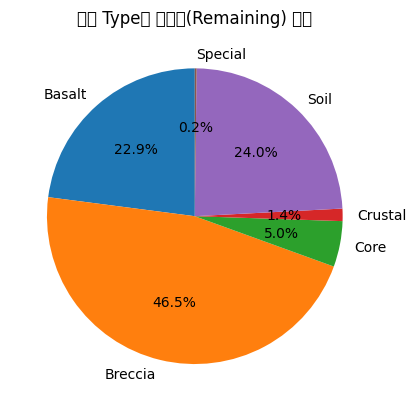

In [197]:
# needed_samples remaining 시각화
# type별 remaining 계산하기
remaining_by_type= rock_samples.groupby('Type')['Remaining (kg)'].sum().reset_index()
remaining_by_type['ratio'] = (remaining_by_type['Remaining (kg)'] / remaining_by_type['Remaining (kg)'].sum()) * 100
labels =  list(remaining_by_type['Type']) # 전체 행의 타입 리스트
plt.pie(
    x=remaining_by_type['ratio'],
    labels=labels,
    autopct='%1.1f%%',           # 퍼센트 표시
    startangle=90
    )
plt.title('암석 Type별 잔존량(Remaining) 비율')
plt.show()

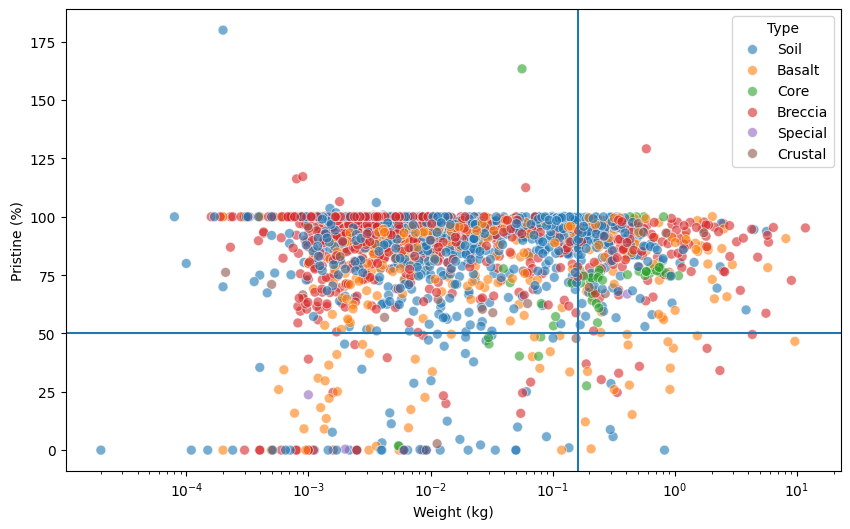

In [171]:
# 암석별 prinstine 분포
sns.reset_defaults()
plt.figure(figsize=(10,6))
sns.scatterplot(
    data = rock_samples,
    x='Weight (kg)', 
    y='Pristine (%)', 
    hue='Type',
    alpha=0.6,
    s=50
)

plt.xscale('log')
plt.axvline(x=0.16)
plt.axhline(y=50)
plt.show()


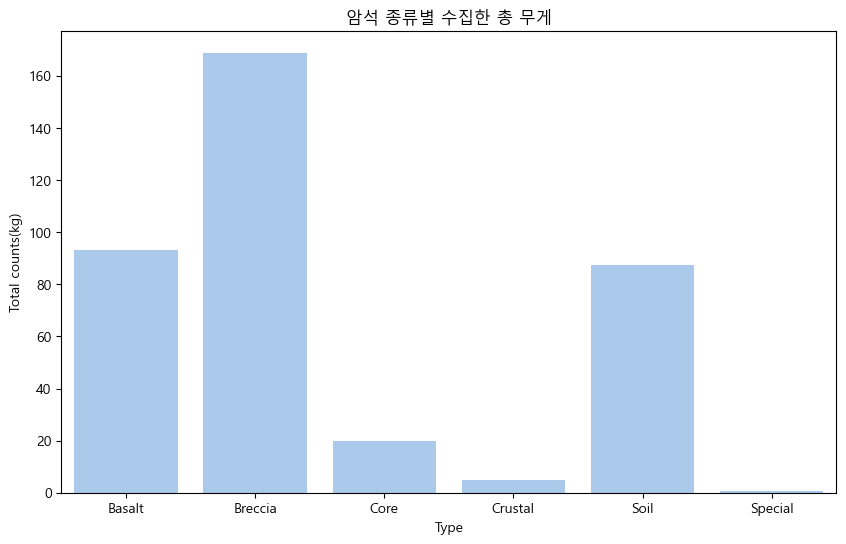

In [165]:
# 암석 종류별 수집했던 개수
sns.set_palette('pastel')

plt.figure(figsize=(10,6))
rock_counts = rock_samples.groupby('Type')['Weight (kg)'].sum().reset_index()
sns.barplot(
    data= rock_counts,
    x='Type',
    y='Weight (kg)'
)

plt.title('암석 종류별 수집한 총 무게')
plt.ylabel('Total counts(kg)')
plt.show()

2. 수집해야 할 암석의 무게      
* 아폴로 미션들의 데이터에서 우주선 중량 중 암석 샘플들이 차지했던 비율을 도춣하고, 이를 비슷하게 아르테미스 우주선 중량 데이터에 적용시켜, 위에서 필요했던 3가지 암석 각각의 중량을 구한다.
    1. 아폴로 미션 - 2가지 방법으로 암석 샘플 비율
        * 승무원 영역 대비 샘플 비율
        * 탑재 중량 대비 샘플 비율
        * => 두 방법의 평균
        * => 아르테미스 미션 별 평균의 평균
    2. 아르테미스 우주선 중량에 위 비율을 적용
        => 우주선 무게는 알고 있으므로 비율을 적용하면 암석을 어느 무게까지 수집가능한지 도출 가능
    3. 아폴로 미션에서 위 1번에서 구한 3가지 암석이 전체에서 차지하는 비율을 구하기
    4. 2번 총 수집 가능한 무게에 3번의 암석별 비율을 적용해 각 암석 종류 당 얼만큼 수집 가능한지 도출

In [232]:
needed_samples_overview[['Type','Weight to collect']]

,Type,Weight to collect
0,Basalt,16.467267
1,Breccia,44.991764
2,Crustal,2.158103


3. 수집해야 할 암석의 개수
    * 아폴로 미션 암석 데이터 중 위의 3가지 암석 종류별 평균 무게 / 암석 종류별 개수 => 암석의 개수를 도출함

In [235]:
needed_samples_overview[['Type','Rocks to collect']]

,Type,Rocks to collect
0,Basalt,13.231731
1,Breccia,35.571884
2,Crustal,20.922917


In [242]:
results = needed_samples_overview[['Type', 'Weight to collect' ,'Rocks to collect']]
results

,Type,Weight to collect,Rocks to collect
0,Basalt,16.467267,13.231731
1,Breccia,44.991764,35.571884
2,Crustal,2.158103,20.922917


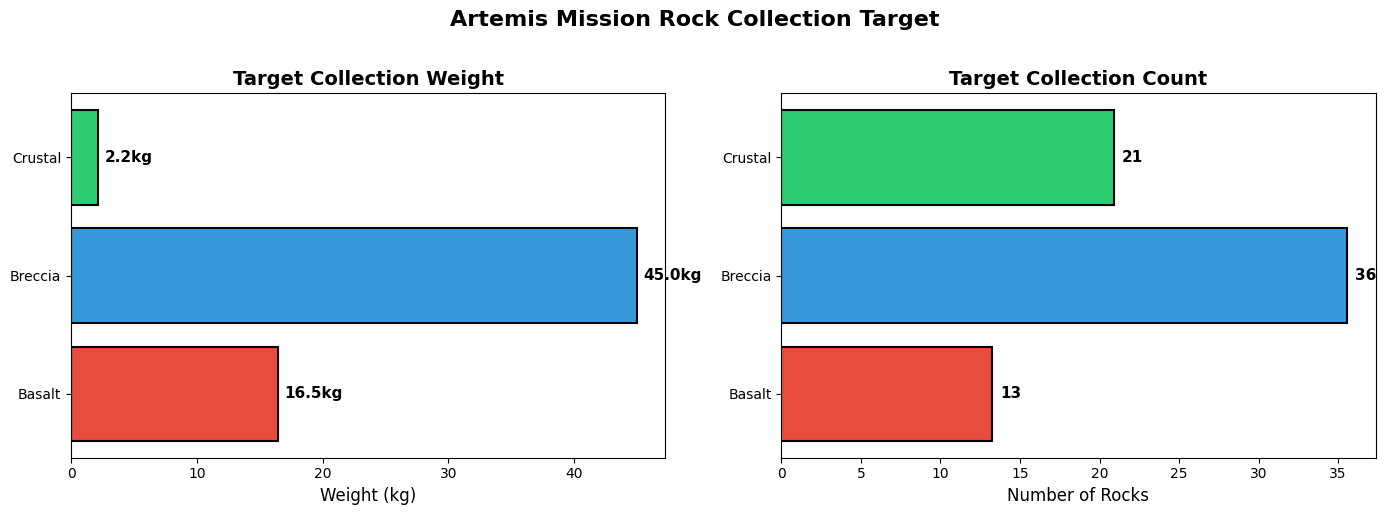

In [249]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

palette = {'Basalt': '#e74c3c', 'Breccia': '#3498db', 'Crustal': '#2ecc71'}
colors = [palette[t] for t in needed_samples_overview['Type']]

# Left: Weight
axes[0].barh(needed_samples_overview['Type'], needed_samples_overview['Weight to collect'], 
             color=colors, edgecolor='black', linewidth=1.5)
axes[0].set_xlabel('Weight (kg)', fontsize=12)
axes[0].set_title('Target Collection Weight', fontsize=14, fontweight='bold')

for i, v in enumerate(needed_samples_overview['Weight to collect']):
    axes[0].text(v + 0.5, i, f'{v:.1f}kg', va='center', fontsize=11, fontweight='bold')

# Right: Rocks
axes[1].barh(needed_samples_overview['Type'], needed_samples_overview['Rocks to collect'], 
             color=colors, edgecolor='black', linewidth=1.5)
axes[1].set_xlabel('Number of Rocks', fontsize=12)
axes[1].set_title('Target Collection Count', fontsize=14, fontweight='bold')

for i, v in enumerate(needed_samples_overview['Rocks to collect']):
    axes[1].text(v + 0.5, i, f'{v:.0f}', va='center', fontsize=11, fontweight='bold')

plt.suptitle('Artemis Mission Rock Collection Target', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()